In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\wen\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('./data/who_covid_19_sit_rep_time_series.csv')
df.head()

,Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020
0,Confirmed,Globally,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,...,413467.0,462684.0,509164.0,571659.0,634813.0,693282.0,750890.0,823626.0,896450.0,972303.0
1,Deaths,Globally,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18433.0,20834.0,23335.0,26493.0,29891.0,33106.0,36405.0,40598.0,45525.0,50321.0
2,Confirmed,China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,...,81848.0,81961.0,82078.0,82230.0,82341.0,82447.0,82545.0,82631.0,82724.0,82802.0
3,Confirmed,Outside of China,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,...,331619.0,380723.0,427086.0,489429.0,552472.0,610835.0,668345.0,740995.0,813726.0,889501.0
4,Deaths,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,80.0,...,3287.0,3293.0,3298.0,3301.0,3306.0,3310.0,3314.0,3321.0,3327.0,3331.0


In [3]:
selection = ['China', 'Japan', 'United States of America', 'Italy', 'Spain', 'Germany', 'Republic of Korea']
df3 = df[df['Country/Region'].isin(selection) & df['Province/States'].isnull()]
df3.head()

,Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020
40,NaN,China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,...,81848.0,81961.0,82078.0,82230.0,82341.0,82447.0,82545.0,82631.0,82724.0,82802.0
41,NaN,Republic of Korea,Western Pacific Region,1.0,1.0,1.0,2.0,2.0,2.0,4.0,...,9137.0,9241.0,9332.0,9478.0,9583.0,9661.0,9786.0,9887.0,9976.0,10062.0
44,NaN,Japan,Western Pacific Region,1.0,1.0,1.0,1.0,3.0,3.0,4.0,...,1193.0,1291.0,1387.0,1499.0,1693.0,1866.0,1953.0,2178.0,2384.0,2617.0
59,NaN,Italy,European Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69176.0,74386.0,80539.0,86498.0,92472.0,97689.0,101739.0,105792.0,110574.0,115242.0
60,NaN,Spain,European Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39673.0,47610.0,56188.0,64059.0,72248.0,78797.0,85195.0,94417.0,102136.0,110238.0


In [4]:
df3 = df3.drop(['Province/States', 'WHO region'], axis=1)
df3 = df3.fillna(0)
df3.head()

,Country/Region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020
40,China,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,4537.0,5997.0,...,81848.0,81961.0,82078.0,82230.0,82341.0,82447.0,82545.0,82631.0,82724.0,82802.0
41,Republic of Korea,1.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,...,9137.0,9241.0,9332.0,9478.0,9583.0,9661.0,9786.0,9887.0,9976.0,10062.0
44,Japan,1.0,1.0,1.0,1.0,3.0,3.0,4.0,6.0,7.0,...,1193.0,1291.0,1387.0,1499.0,1693.0,1866.0,1953.0,2178.0,2384.0,2617.0
59,Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69176.0,74386.0,80539.0,86498.0,92472.0,97689.0,101739.0,105792.0,110574.0,115242.0
60,Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39673.0,47610.0,56188.0,64059.0,72248.0,78797.0,85195.0,94417.0,102136.0,110238.0


In [5]:
df3['Country/Region'].replace({'Republic of Korea':'Korea', 'United States of America':'America'}, inplace=True)
df3 = df3.set_index('Country/Region')
df3

,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,4537.0,5997.0,7736.0,...,81848.0,81961.0,82078.0,82230.0,82341.0,82447.0,82545.0,82631.0,82724.0,82802.0
Korea,1.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,...,9137.0,9241.0,9332.0,9478.0,9583.0,9661.0,9786.0,9887.0,9976.0,10062.0
Japan,1.0,1.0,1.0,1.0,3.0,3.0,4.0,6.0,7.0,11.0,...,1193.0,1291.0,1387.0,1499.0,1693.0,1866.0,1953.0,2178.0,2384.0,2617.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69176.0,74386.0,80539.0,86498.0,92472.0,97689.0,101739.0,105792.0,110574.0,115242.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39673.0,47610.0,56188.0,64059.0,72248.0,78797.0,85195.0,94417.0,102136.0,110238.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,...,31554.0,36508.0,42288.0,48582.0,52547.0,57298.0,61913.0,67366.0,73522.0,79696.0
America,0.0,0.0,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0,...,51914.0,63570.0,68334.0,85228.0,103321.0,122653.0,140640.0,163199.0,187320.0,213600.0


In [ ]:
import seaborn as sns

plt.figure(figsize=(12,5))
for i in range(df3.shape[1]):
    print(i, end=' ')
    sns.barplot(x=df3.index, y=df3.iloc[:, i])
    plt.title(df3.columns[i], fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Country', fontsize=20)
    plt.ylabel('Confirm Number', fontsize=20)
    plt.ylim(0, max(df3.iloc[:, i].max(), df3.max()[i//10+10])*1.1)
    if i+10 > df3.shape[1]:
        plt.ylim(0, df3.max()[i]*1.1)
    plt.savefig('./data/'+str(i)+'.jpg')
    #assert 0
#plt.bar(df3.index, df3.iloc[:, 0])

In [8]:
import imageio
def create_gif(image_list, gif_name, duration = 1.0):
    '''
    :param image_list: 这个列表用于存放生成动图的图片
    :param gif_name: 字符串，所生成gif文件名，带.gif后缀
    :param duration: 图像间隔时间
    :return:
    '''
    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))

    imageio.mimsave(gif_name, frames, 'GIF', duration=duration)
    return

def main():
    #这里放上自己所需要合成的图片
    image_list = ['./data/{}.jpg'.format(p) for p in range(74)]
    gif_name = './data/ConfirmGif.gif'
    duration = 0.3
    create_gif(image_list, gif_name, duration)

if __name__ == '__main__':
    main()

![SegmentLocal](data/ConfirmGif.gif "segment")

In [15]:
df4 = df3.reset_index()
df4

,Country/Region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020
0,China,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,4537.0,5997.0,...,81848.0,81961.0,82078.0,82230.0,82341.0,82447.0,82545.0,82631.0,82724.0,82802.0
1,Korea,1.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,...,9137.0,9241.0,9332.0,9478.0,9583.0,9661.0,9786.0,9887.0,9976.0,10062.0
2,Japan,1.0,1.0,1.0,1.0,3.0,3.0,4.0,6.0,7.0,...,1193.0,1291.0,1387.0,1499.0,1693.0,1866.0,1953.0,2178.0,2384.0,2617.0
3,Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69176.0,74386.0,80539.0,86498.0,92472.0,97689.0,101739.0,105792.0,110574.0,115242.0
4,Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39673.0,47610.0,56188.0,64059.0,72248.0,78797.0,85195.0,94417.0,102136.0,110238.0
5,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,...,31554.0,36508.0,42288.0,48582.0,52547.0,57298.0,61913.0,67366.0,73522.0,79696.0
6,America,0.0,0.0,1.0,1.0,2.0,2.0,5.0,5.0,5.0,...,51914.0,63570.0,68334.0,85228.0,103321.0,122653.0,140640.0,163199.0,187320.0,213600.0


'1/21/2020'

50 

AssertionError: 

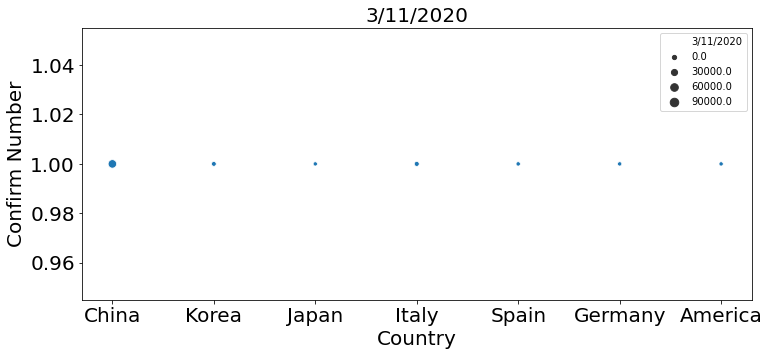

In [25]:
import seaborn as sns
#sns.scatterplot(x="total_bill", y="tip",hue="time", size="time",data=tips)
#plt.show()
plt.figure(figsize=(12,5))
for i in range(50,70):#df4.shape[1]
    print(i, end=' ')
    sns.scatterplot(x='Country/Region', y=1, size=df4.columns[i+1], data=df4)
    plt.title(df4.columns[i+1], fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Country', fontsize=20)
    plt.ylabel('Confirm Number', fontsize=20)
    #plt.ylim(0, max(df3.iloc[:, i].max(), df3.max()[i//10+10])*1.1)
    #if i+10 > df3.shape[1]:
        #plt.ylim(0, df3.max()[i]*1.1)
    #plt.savefig('./data/S'+str(i)+'.jpg')
    assert 0
#plt.bar(df3.index, df3.iloc[:, 0])